# Gather

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
%matplotlib inline

## Data

In [3]:
if not os.path.exists('green_tripdata_2016-02.csv'):
    r = requests.get('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-02.csv')
    with open('green_tripdata_2016-02.csv', 'wb') as f:
        f.write(r.content)
else:
    green_taxi_data = pd.read_csv('green_tripdata_2016-02.csv')

In [4]:
green_taxi_data = pd.read_csv('green_tripdata_2016-02.csv')
green_taxi_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,...,13.0,0.5,0.5,0.00,0.0,NaN,0.3,14.30,2,1.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,...,17.5,0.5,0.5,3.76,0.0,NaN,0.3,22.56,1,1.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,...,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


# Assess

In [5]:
green_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510722 entries, 0 to 1510721
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1510722 non-null  int64  
 1   lpep_pickup_datetime   1510722 non-null  object 
 2   Lpep_dropoff_datetime  1510722 non-null  object 
 3   Store_and_fwd_flag     1510722 non-null  object 
 4   RateCodeID             1510722 non-null  int64  
 5   Pickup_longitude       1510722 non-null  float64
 6   Pickup_latitude        1510722 non-null  float64
 7   Dropoff_longitude      1510722 non-null  float64
 8   Dropoff_latitude       1510722 non-null  float64
 9   Passenger_count        1510722 non-null  int64  
 10  Trip_distance          1510722 non-null  float64
 11  Fare_amount            1510722 non-null  float64
 12  Extra                  1510722 non-null  float64
 13  MTA_tax                1510722 non-null  float64
 14  Tip_amount        

In [6]:
green_taxi_data.shape

(1510722, 21)

In [7]:
green_taxi_data.lpep_pickup_datetime.head(1), green_taxi_data.lpep_pickup_datetime.tail(1)

(0    2016-02-01 00:00:01
 Name: lpep_pickup_datetime, dtype: object,
 1510721    2016-02-29 23:00:10
 Name: lpep_pickup_datetime, dtype: object)

In [8]:
type(green_taxi_data.lpep_pickup_datetime[0])

str

In [9]:
green_taxi_data.VendorID.value_counts()

2    1186142
1     324580
Name: VendorID, dtype: int64

In [10]:
green_taxi_data.duplicated().sum()

0

In [11]:
green_taxi_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

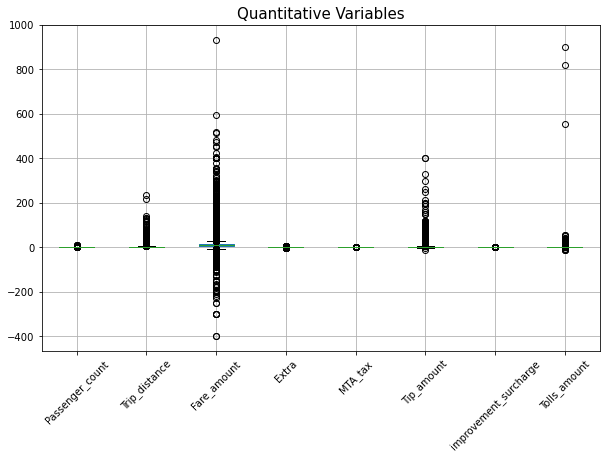

In [12]:
# check for outliers
quantitative_variables = ['Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
                          'Tip_amount', 'improvement_surcharge', 'Tolls_amount']
plt.figure(figsize=(10,6))
green_taxi_data[quantitative_variables].boxplot()
plt.title('Quantitative Variables', size=15)
plt.xticks(rotation=45)
plt.show()

In [13]:
green_taxi_data[green_taxi_data.Passenger_count < 1][green_taxi_data.Fare_amount==0]\
               [['Passenger_count','Fare_amount']].sample(5)                                                    

<ipython-input-13-8cbfc9ca0410>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  green_taxi_data[green_taxi_data.Passenger_count < 1][green_taxi_data.Fare_amount==0]\


,Passenger_count,Fare_amount
1400075,0,0.0
302951,0,0.0
956566,0,0.0
1046828,0,0.0
1417847,0,0.0


In [14]:
green_taxi_data[green_taxi_data.Fare_amount < 0].Fare_amount.sample(5)

679460      -2.50
1423912    -20.80
1426016     -3.00
1252155     -3.50
248733    -209.55
Name: Fare_amount, dtype: float64

In [15]:
green_taxi_data[green_taxi_data.Tip_amount < 0].Tip_amount.sample(5)

332407    -2.70
790257    -0.99
53705     -0.99
841846    -0.10
1029013   -1.36
Name: Tip_amount, dtype: float64

In [16]:
green_taxi_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [17]:
len(green_taxi_data[green_taxi_data['Pickup_latitude'] == 0])

2567

## Quality
- Ehail_fee column has no values
- names of date and time columns
- date and time columns are objects
- columns have capital letters and others have small letters
- some trips have 0 passengers and 0 fare amount, probably wrong entries or canceled trips
- many quantitative amounts have negative values, probably negative signs were put by mistake
- pickup latitude and longitude have zero values

## Tidiness
- day of week column
- day of month column
- hour column
- weekday column
- unnecessary columns

# Clean

In [18]:
df_clean = green_taxi_data.copy()

## Quality

### Define

- drop Ehail_fee column

### Code

In [19]:
df_clean.drop(columns='Ehail_fee', inplace=True)

### Test

In [20]:
'Ehail_fee' in df_clean.columns

False

### Define

- change names of 'lpep_pickup_datetime', 'Lpep_dropoff_datetime'

### Code

In [21]:
df_clean.rename(columns={'lpep_pickup_datetime':'pickup_time', 'Lpep_dropoff_datetime':'dropoff_time'}, inplace=True)

### Test

In [22]:
df_clean.columns[1:3]

Index(['pickup_time', 'dropoff_time'], dtype='object')

### Define

- convert date and time columns into datetime

### Code

In [23]:
df_clean['pickup_time'] = pd.to_datetime(df_clean['pickup_time'])
df_clean['dropoff_time'] = pd.to_datetime(df_clean['dropoff_time'])

### Test

In [24]:
df_clean[['pickup_time', 'dropoff_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510722 entries, 0 to 1510721
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   pickup_time   1510722 non-null  datetime64[ns]
 1   dropoff_time  1510722 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 23.1 MB


### Define

- make all names of the columns lowercase
- make VendorID and RateCodeID like the rest of columns' names

### Code

In [25]:
columns = df_clean.columns
lowercase_columns = [column.lower().strip() for column in columns]
df_clean.columns = lowercase_columns
df_clean.rename(columns={'vendorid':'vendor_id', 'ratecodid':'rate_code_id'}, inplace=True)

### Test

In [26]:
df_clean.columns

Index(['vendor_id', 'pickup_time', 'dropoff_time', 'store_and_fwd_flag',
       'ratecodeid', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type',
       'trip_type'],
      dtype='object')

### Define

- remove rows that have 0 passenger count and 0 fare amount

### Code

In [27]:
indices_to_drop = df_clean[df_clean['passenger_count']==0][df_clean['fare_amount']==0].index
df_clean.drop(index=indices_to_drop, inplace=True)

<ipython-input-27-f198a6659489>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices_to_drop = df_clean[df_clean['passenger_count']==0][df_clean['fare_amount']==0].index


### Test

In [28]:
df_clean[df_clean['passenger_count']==0][df_clean['fare_amount']==0]

<ipython-input-28-f90f0ac5f10c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean[df_clean['passenger_count']==0][df_clean['fare_amount']==0]


,vendor_id,pickup_time,dropoff_time,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


### Define

- multiply negative values by -1

### Code

In [29]:
quantitative_variables = [col.lower() for col in quantitative_variables]
for variable in quantitative_variables:
    df_clean[variable] = df_clean[variable].apply(lambda x: -1*x if x < 0 else x)

### Test

In [30]:
df_clean[df_clean['fare_amount'] < 0]

,vendor_id,pickup_time,dropoff_time,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


### Define

- remove rows with longitude and latitude having zero as values.

### Code

In [31]:
indices_to_drop = df_clean[(df_clean['pickup_latitude']==0)].index
df_clean.drop(index=indices_to_drop, inplace=True)

In [32]:
indices_to_drop = df_clean[(df_clean['pickup_longitude']==0)].index
df_clean.drop(index=indices_to_drop, inplace=True)

### Test

In [33]:
df_clean[df_clean['pickup_latitude']==0]

,vendor_id,pickup_time,dropoff_time,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [34]:
df_clean[df_clean['pickup_longitude']==0]

,vendor_id,pickup_time,dropoff_time,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


## Tidiness

### Define

- create day_of_week column based on pickup_time

### Code

In [35]:
df_clean['day_of_week'] = df_clean['pickup_time'].dt.dayofweek

### Test

In [36]:
'day_of_week' in df_clean.columns

True

### Define

- create day_of_month column based on pickup_time

### Code

In [37]:
df_clean['day_of_month'] = df_clean['pickup_time'].dt.day

### Test

In [38]:
'day_of_month' in df_clean.columns

True

### Define

- create hour column based on pickup_time

### Code

In [39]:
df_clean['hour'] = df_clean['pickup_time'].dt.hour

### Test

In [40]:
'hour' in df_clean.columns

True

### Define

- create weekend column based on day_of_week column

### Code

In [41]:
df_clean['weekend'] = df_clean['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

### Test

In [42]:
df_clean['weekend'].sample(5)

448315    0
245695    1
893214    0
447518    0
740779    0
Name: weekend, dtype: int64

### Define

- drop unnecessary columns that would not impact the desire of this analysis

### Code

In [43]:
unnecessary_cols = ['vendor_id', 'store_and_fwd_flag', 'ratecodeid', 'dropoff_longitude', 'dropoff_latitude', 'extra', 'mta_tax', 'tip_amount',
                    'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type',
                    'trip_type']
df_clean.drop(columns=unnecessary_cols, inplace=True)

### Test

In [44]:
df_clean.columns

Index(['pickup_time', 'dropoff_time', 'pickup_longitude', 'pickup_latitude',
       'passenger_count', 'trip_distance', 'fare_amount', 'day_of_week',
       'day_of_month', 'hour', 'weekend'],
      dtype='object')

# Storing Data

In [45]:
df_clean.to_csv('green_taxi_clean.csv', index=False)